# Loading data in pandas

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('titanic.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [52]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

# Dropping Columns which are not useful

In [29]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols,axis=1)


In [30]:
df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 9 columns]

In [53]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [55]:
df.describe(include="all")

PassengerId    Survived      Pclass   Sex         Age       SibSp  \
count    891.000000  891.000000  891.000000   891  714.000000  891.000000   
unique          NaN         NaN         NaN     2         NaN         NaN   
top             NaN         NaN         NaN  male         NaN         NaN   
freq            NaN         NaN         NaN   577         NaN         NaN   
mean     446.000000    0.383838    2.308642   NaN   29.699118    0.523008   
std      257.353842    0.486592    0.836071   NaN   14.526497    1.102743   
min        1.000000    0.000000    1.000000   NaN    0.420000    0.000000   
25%      223.500000    0.000000    2.000000   NaN   20.125000    0.000000   
50%      446.000000    0.000000    3.000000   NaN   28.000000    0.000000   
75%      668.500000    1.000000    3.000000   NaN   38.000000    1.000000   
max      891.000000    1.000000    3.000000   NaN   80.000000    8.000000   

             Parch        Fare Embarked  
count   891.000000  891.000000      889  
unique         NaN         NaN        3  
top            NaN         NaN        S  
freq           NaN         NaN      644  
mean      0.381594   32.204208      NaN  
std       0.806057   49.693429      NaN  
min       0.000000    0.000000      NaN  
25%       0.000000    7.910400      NaN  
50%       0.000000   14.454200      NaN  
75%       0.000000   31.000000      NaN  
max       6.000000  512.329200      NaN

# Dropping rows having missing values

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


# Feature Engineering

In [56]:
cat_colm=df.select_dtypes(include=['object']).columns
num_colm=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are:",cat_colm)
print("Numerical Variables are:",num_colm)

Categorical Variables are: Index(['Sex', 'Embarked'], dtype='object')
Numerical Variables are: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


PassengerId


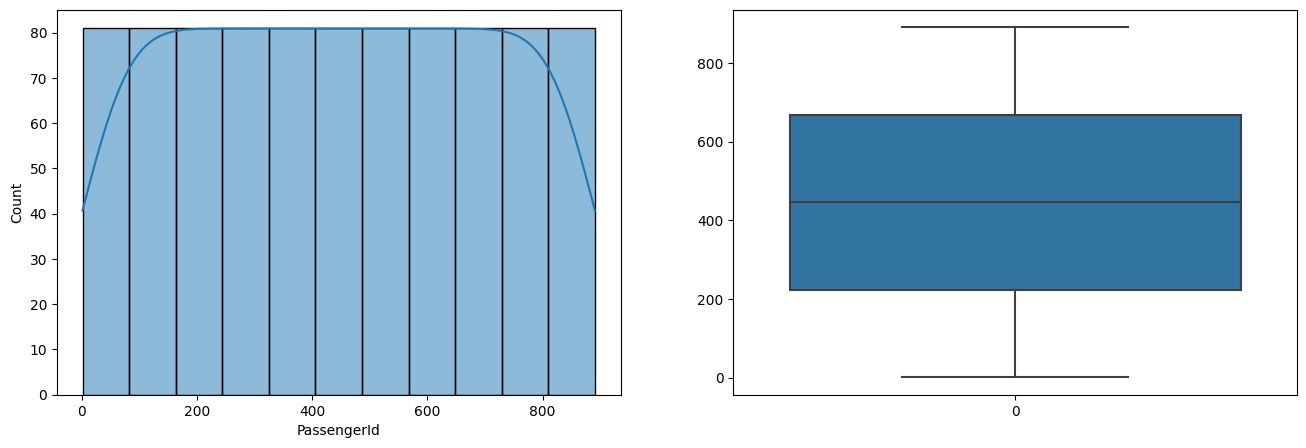

Survived


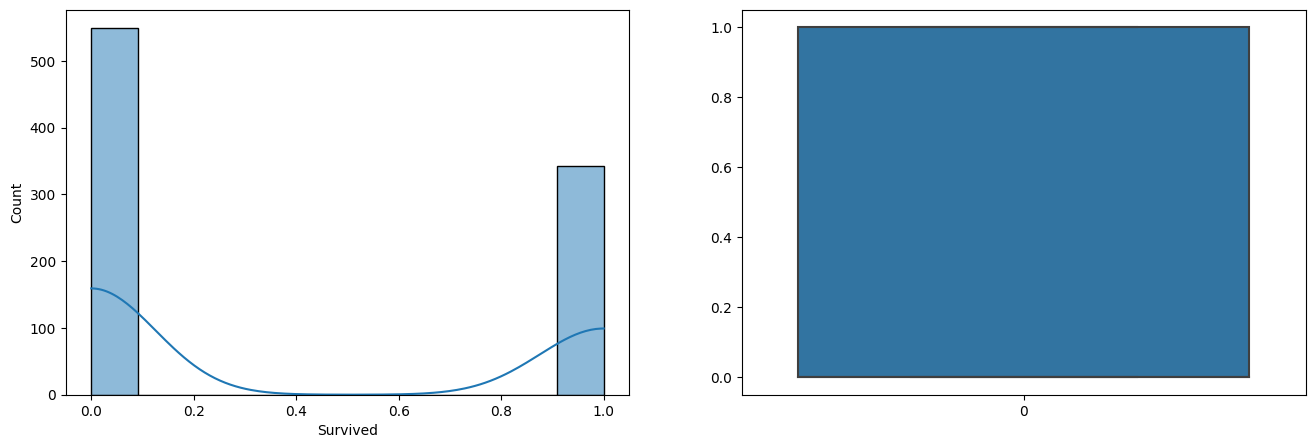

Pclass


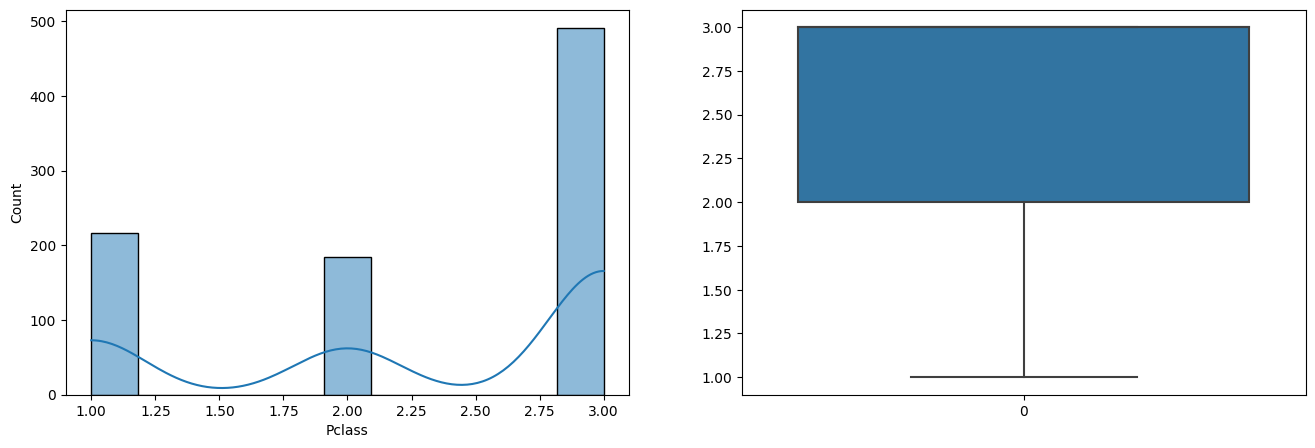

Age


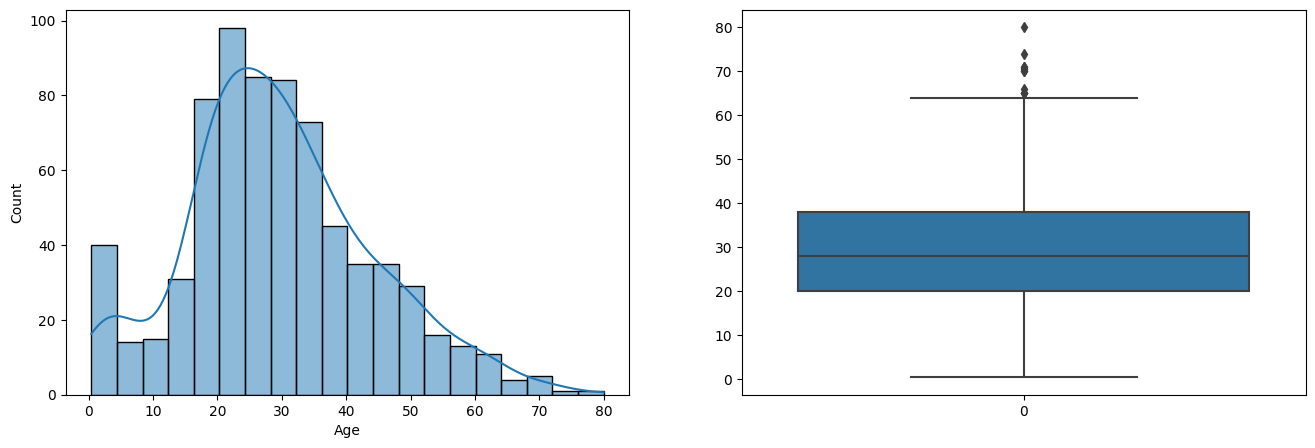

SibSp


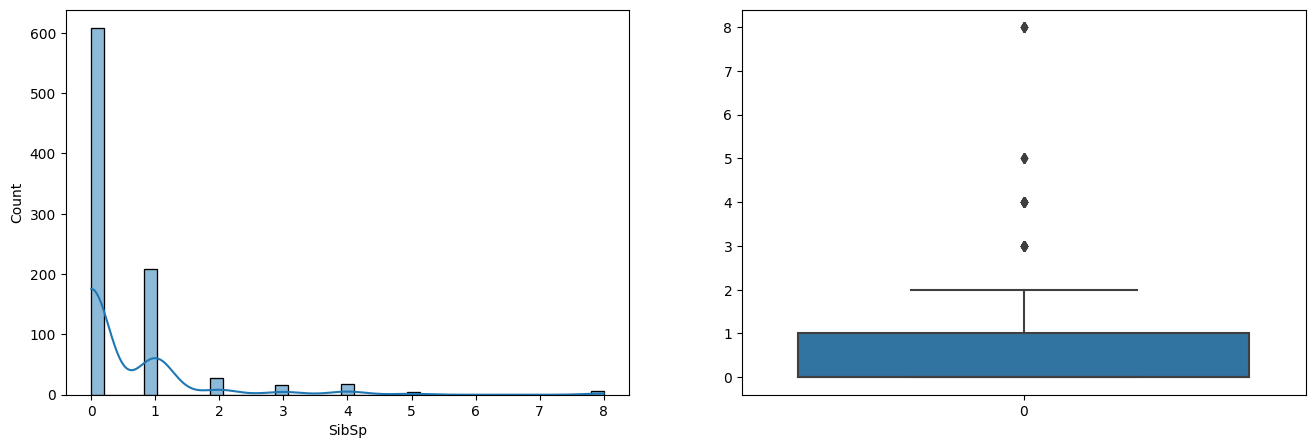

Parch


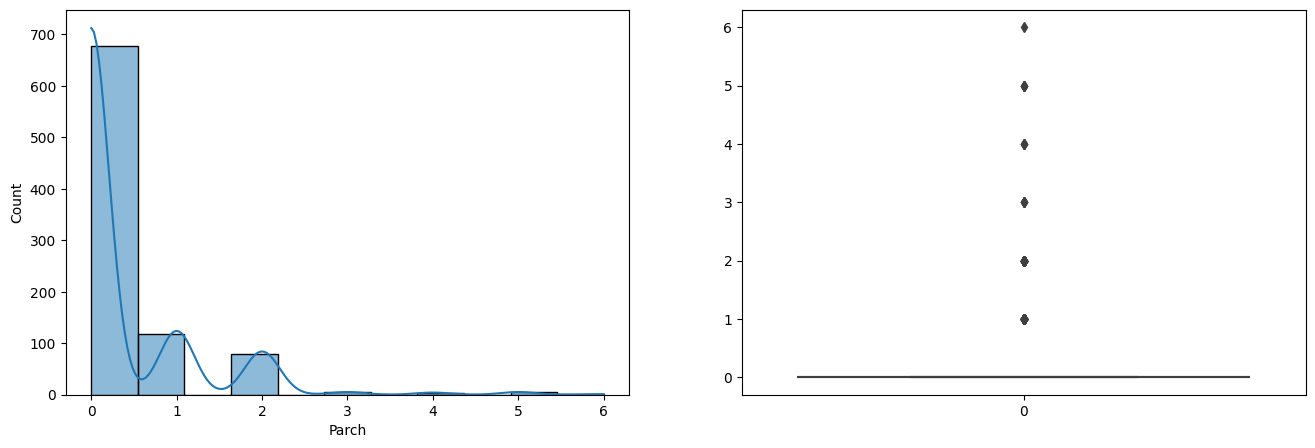

Fare


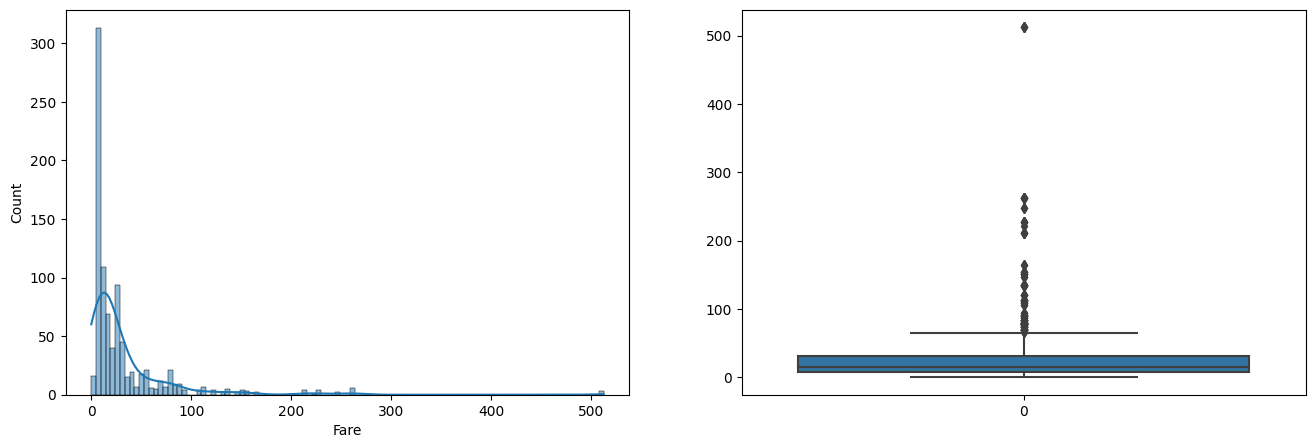

In [59]:
for col in num_colm:
    print(col)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

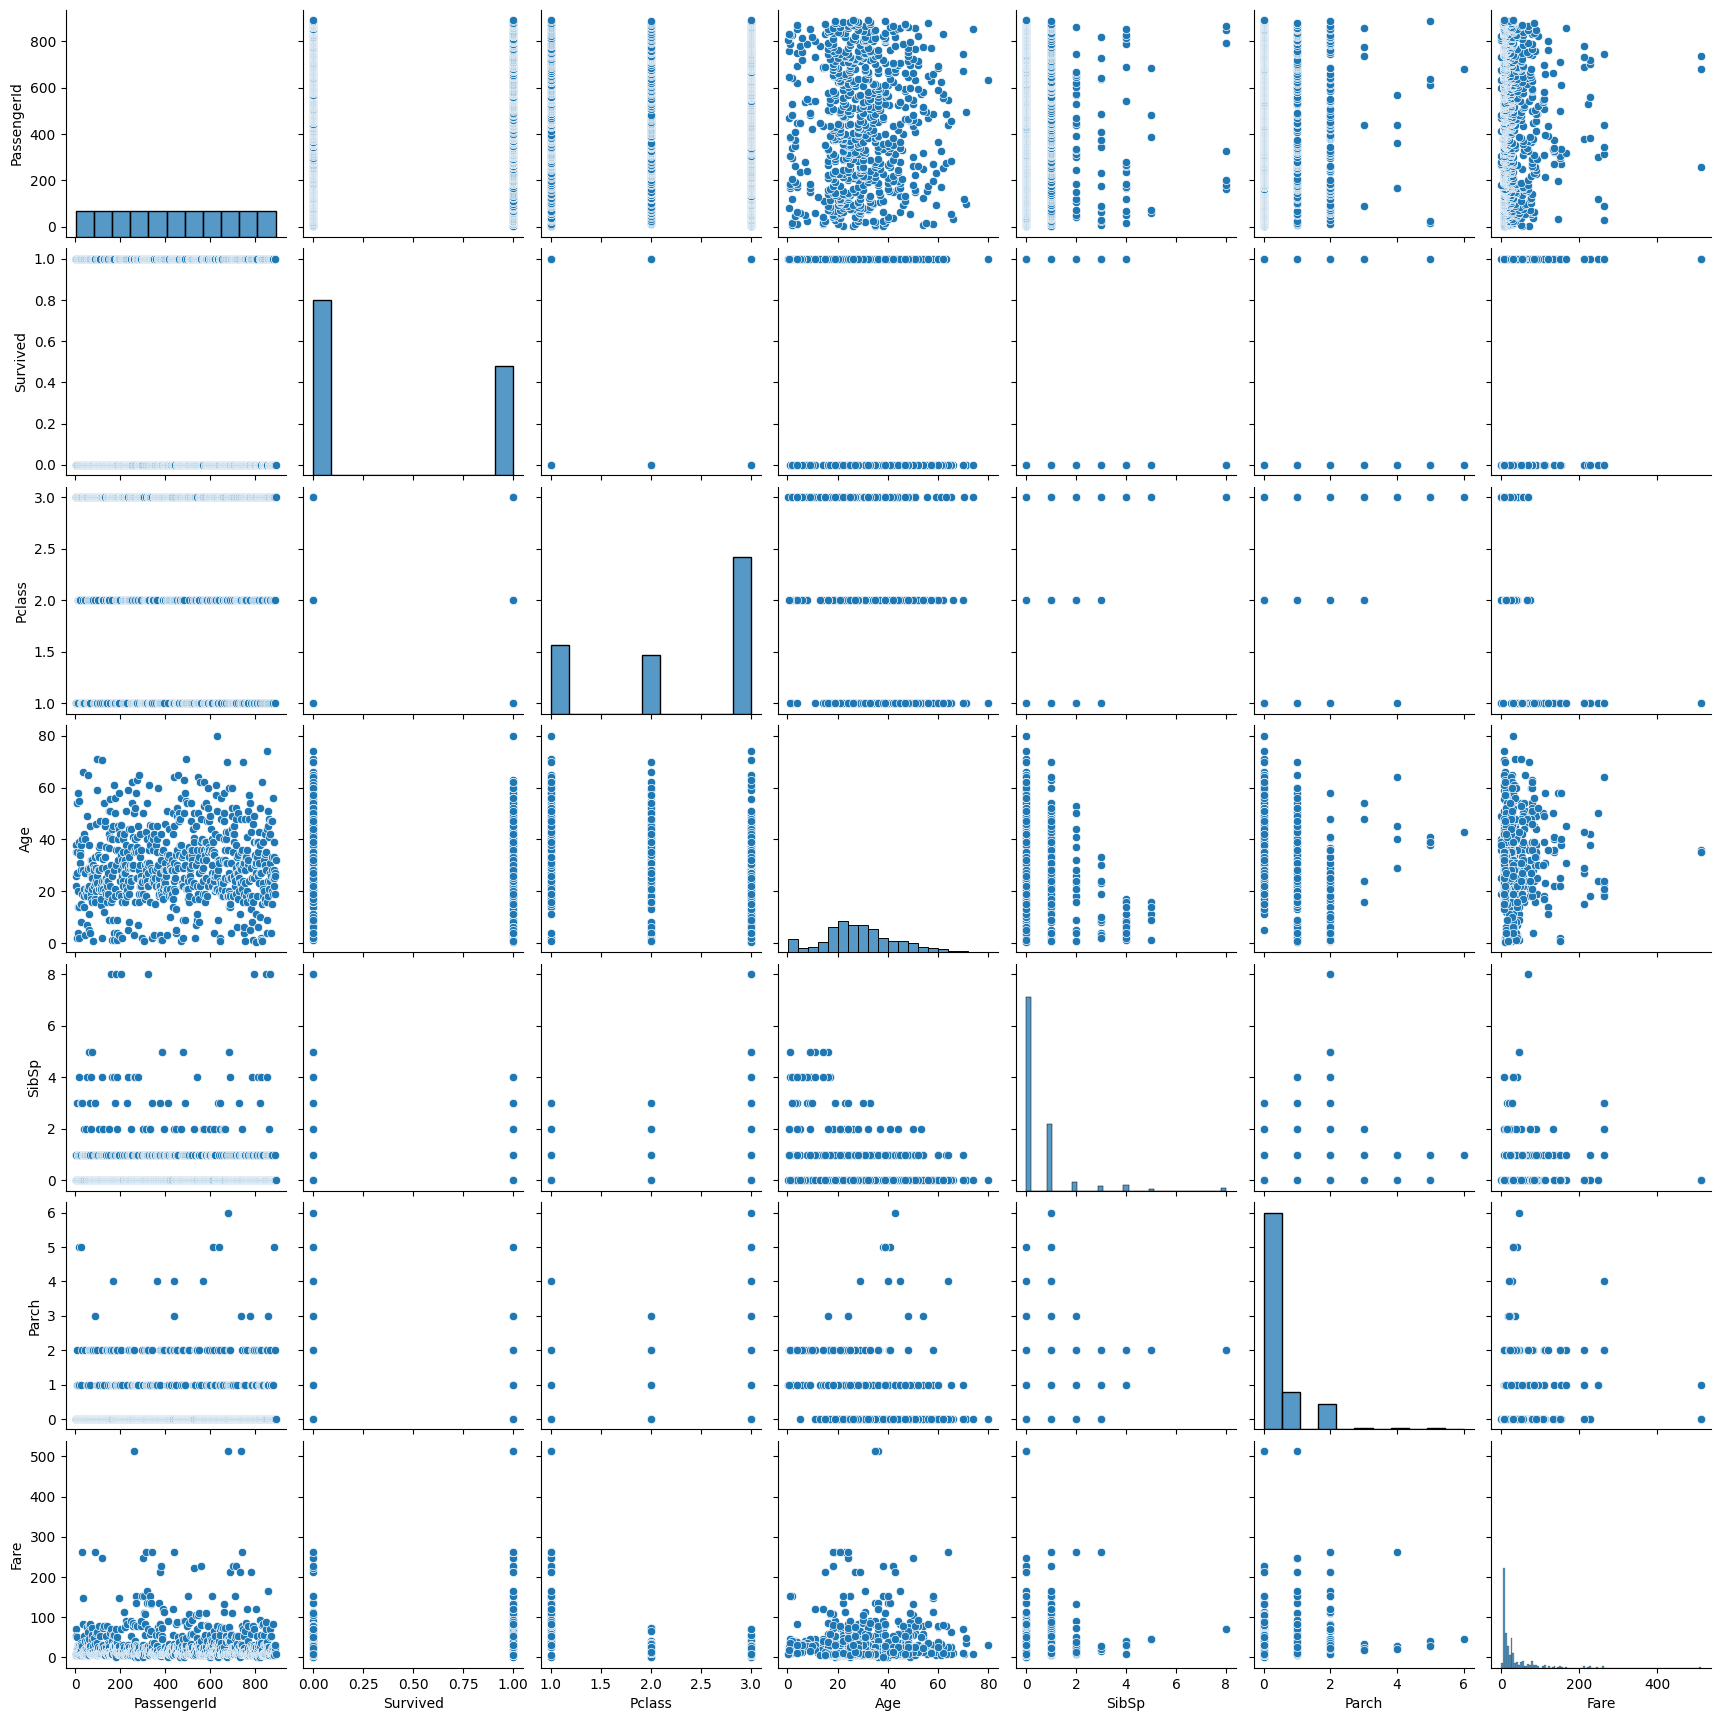

In [60]:
sns.pairplot(df)
plt.show()

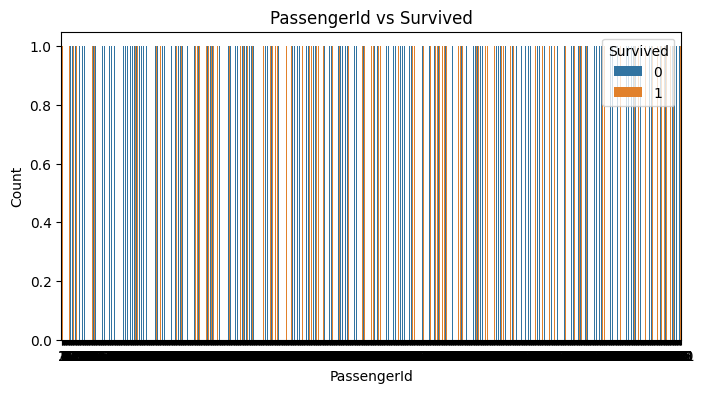

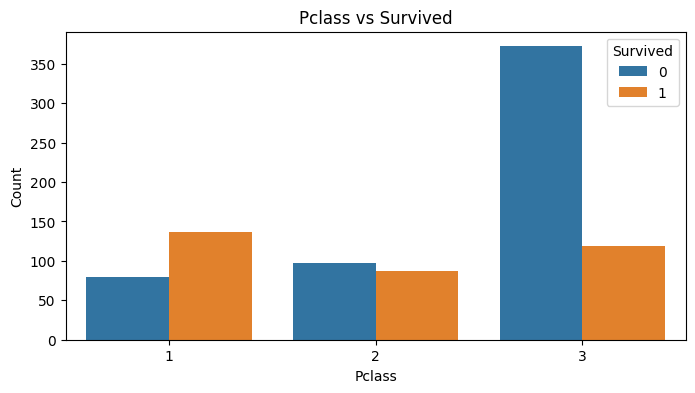

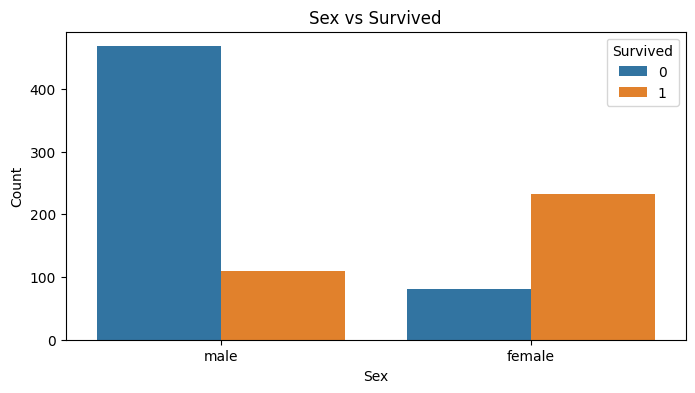

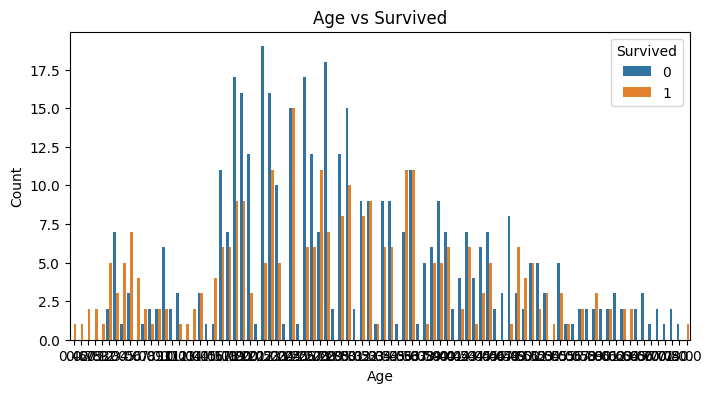

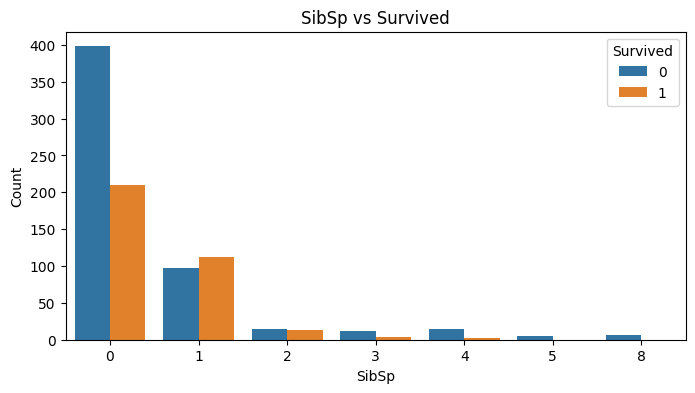

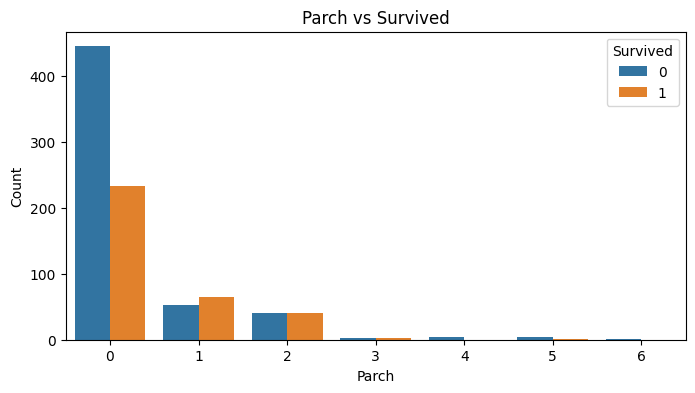

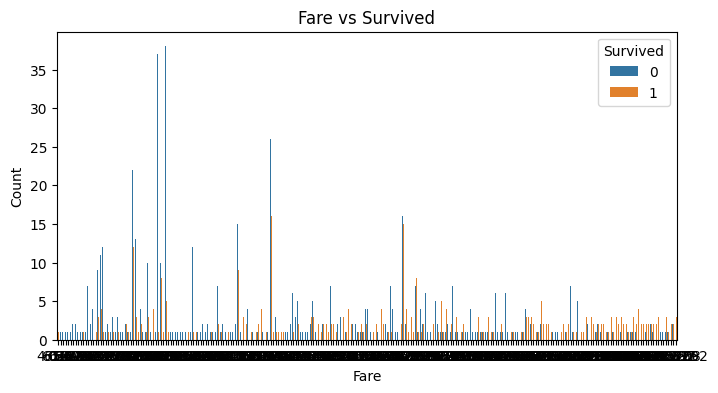

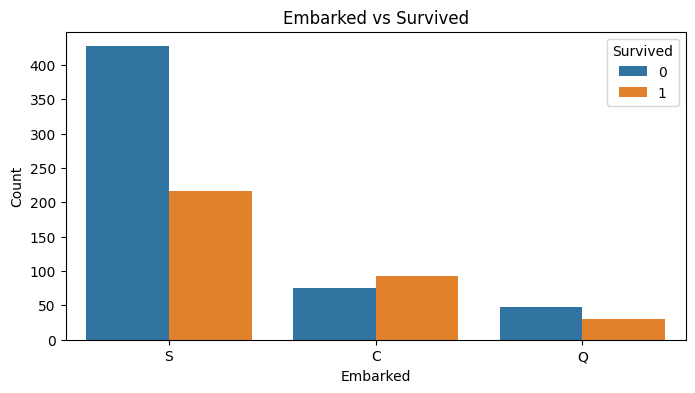

In [61]:
for col in df.columns:
    if col != "Survived":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="Survived", data=df)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs Survived")
        plt.show()

# Creating Dummy Variables

In [8]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [10]:
titanic_dummies = pd.concat(dummies, axis=1)

In [11]:
df = pd.concat((df,titanic_dummies), axis=1)

In [12]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   1            712 non-null    bool   
 7   2            712 non-null    bool   
 8   3            712 non-null    bool   
 9   female       712 non-null    bool   
 10  male         712 non-null    bool   
 11  C            712 non-null    bool   
 12  Q            712 non-null    bool   
 13  S            712 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 44.5 KB


## Taking Care of Missing Data

In [14]:
df['Age'] = df['Age'].interpolate()

C:\Users\pc\AppData\Local\Temp\ipykernel_18852\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

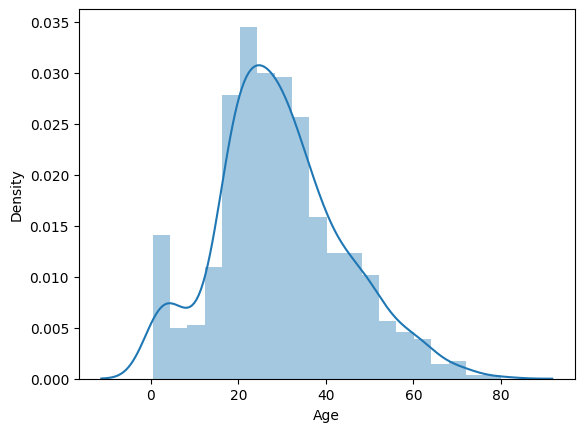

In [62]:
sns.distplot(df.Age)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   1            712 non-null    bool   
 7   2            712 non-null    bool   
 8   3            712 non-null    bool   
 9   female       712 non-null    bool   
 10  male         712 non-null    bool   
 11  C            712 non-null    bool   
 12  Q            712 non-null    bool   
 13  S            712 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 44.5 KB


# Converting the dataframe to numpy

In [16]:
X = df.values
y = df['Survived'].values

In [17]:
import numpy as np
X = np.delete(X, 1, axis=1)

# Dividing data set into training set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
len(X_train)

498

In [63]:
len(X_test)

214